# HW2_Q6

sklearn.datasets.make_regression:  This command is used in the Scikit-learn library to create a synthetic dataset for regression problems.  In other words, this command produces a data set along with a linear model that generated the data.  This dataset can be used to train and evaluate regression algorithms such as Perceptron.

parameters:
    n_samples: the number of data samples  
    n_features: the number of features of each sample  
    n_informative: the number of features effective in creating the output  
    noise: the amount of noise added to the output

In [46]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Accuracy: 1.0


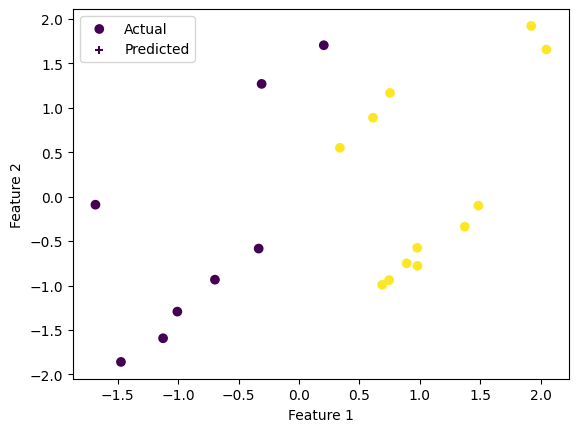

In [47]:
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Ensure data types are compatible
    if not (X_train.dtype == np.float64 and y_train.dtype == np.float64):
        X_train = X_train.astype(float)
        y_train = y_train.astype(float)
        X_test = X_test.astype(float)
        y_test = y_test.astype(float)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    model = Perceptron(eta0=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Visualize results
    if X.shape[1] == 2:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Actual')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='+', label='Predicted')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Create a classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Train and evaluate
train_and_evaluate_model(X, y)

Mean Squared Error: 131.84749270744672


c:\Users\NaderZadeh\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


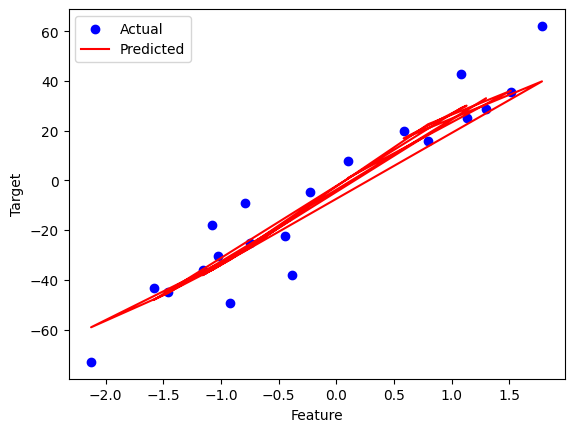

In [48]:
def train_and_evaluate_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42, max_iter=1000, learning_rate_init=0.001)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)


    if X.shape[1] == 1:
        plt.scatter(X_test, y_test, color='blue', label='Actual')
        plt.plot(X_test, y_pred, color='red', label='Predicted')
        plt.xlabel('Feature')
        plt.ylabel('Target')
        plt.legend()
        plt.show()

# Create a regression dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10)

# Train and evaluate
train_and_evaluate_regression_model(X, y)